### https://pythainlp.github.io/attacut/

In [1]:
## https://github.com/PyThaiNLP/wisesight-sentiment/blob/master/kaggle-competition/competition.ipynb

In [2]:
#Load library
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,8))
import seaborn as sns
sns.set_style('whitegrid')
import datetime
from datetime import date

#ML class
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

## Other configurations

pd.options.display.float_format='{:,.3f}'.format

#pd.set_option('display.max_rows', 1000)

##from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import qgrid

from pycaret import nlp
from pycaret import classification
from pycaret import datasets
import re
import string

def beautifuldf(x):    
    return qgrid.show_grid(x,grid_options={'fullWidthRows': True,'syncColumnCellResize': True,
                                 'forceFitColumns': True,'rowHeight': 25,'enableColumnReorder': True,
                                 'enableTextSelectionOnCells': True,'editable': True})

<Figure size 1080x576 with 0 Axes>

In [3]:
import pythainlp
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words
from stop_words import get_stop_words

import nltk

# Prepare Stopword
nltk.download('words')
th_stop = tuple(thai_stopwords())
en_stop = tuple(get_stop_words('en'))
p_stemmer = PorterStemmer()

# Another stopword from pythainlp.corpus
from pythainlp.corpus import thai_stopwords

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

[nltk_data] Downloading package words to /home/blacklis/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
#!python -m spacy download en_core_web_sm
#!python -m textblob.download_corpora

In [5]:
### Define Functions
def clean_msg(msg):            
    msg = re.sub(r'<.*?>','', msg)  # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    msg = re.sub(r'#','',msg)   # ลบ hashtag    
    
    for c in string.punctuation:     # ลบ เครื่องหมายคำพูด (punctuation)
        msg = re.sub(r'\{}'.format(c),'',msg)
        
    msg = ' '.join(msg.split())  # ลบ separator เช่น \n \t
    return msg

#Text Process for logistic regression

import emoji

def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep, text)

def ungroup_emoji(toks):
    res = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            for char in tok:
                res.append(char)
        else:
            res.append(tok)
    return res

def process_text(text):
    #pre rules
    res = text.lower().strip()
    res = replace_url(res)
    res = replace_rep(res)
    
    #tokenize
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    
    #post rules
    res = ungroup_emoji(res)
    
    return res

### Load Data

In [6]:
#LOAD DATA
train = pd.read_csv('./train/train.csv')
test = pd.read_csv('./test/test.csv')
print("Size of train data = ",len(train))
beautifuldf(train.sample(10))

Size of train data =  10330


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [7]:
train.head()

,texts,destination
0,โทรศัพท์มีปัญหาโทรออกได้ แต่เวลาคนอื่นโทรเข้าม...,billing and payment
1,สอบถามเกี่ยวกับการโอนเงินของระบบเติมเงินไปอีกห...,billing and payment
2,แจ้งเครื่องขัดข้อง พอดีดูสัญญาณไม่ได้ค่ะ,billing and payment
3,สวัสดีครับคือผมอยากทราบยอดค้างค่าบริการทั้งหมด...,billing and payment
4,พี่ครับ ผมอยากทราบว่าตอนนี้ยอดค้างของผมเท่าไหร...,billing and payment


In [8]:
#Function for split words (tokenize)

def split_word(text):
    tokens = word_tokenize(text,engine='newmm')
    
    # Remove stop words ภาษาไทย และภาษาอังกฤษ
    #tokens = [i for i in tokens if not i in th_stop and not i in en_stop]
    
    # หารากศัพท์ภาษาไทย และภาษาอังกฤษ
    # English
    #tokens = [p_stemmer.stem(i) for i in tokens]
    
    # Thai
    tokens_temp=[]
    for i in tokens:
        w_syn = wordnet.synsets(i)
        if (len(w_syn)>0) and (len(w_syn[0].lemma_names('tha'))>0):
            tokens_temp.append(w_syn[0].lemma_names('tha')[0])
        else:
            tokens_temp.append(i)
    
    tokens = tokens_temp
    
    # ลบตัวเลข
    #tokens = [i for i in tokens if not i.isnumeric()]
    
    # ลบช่องว่าง
    tokens = [i for i in tokens if not ' ' in i]
    
    return tokens

# My code
#Apply Word Tokenize + Remove blank space to "train"
def my_split_word(text):
    tokens = word_tokenize(text,engine='newmm')
    tokens = [i for i in tokens if not ' ' in i]
    return tokens

def my_split_word_space(text):
    tokens = word_tokenize(text,engine='newmm')
    tokens = [i for i in tokens if not ' ' in i]
    tokens_string = ' '.join(tokens)
    return tokens_string

# =====My original tokenize word code======
# for i in range(train.shape[0]):
#     temp = []
#     train['texts'][i]
#     temp = word_tokenize(train['texts'][i], engine='newmm')
#     print(temp)
#     temp = [x for x in temp if x != ' ']
#     print(temp)
#     temp1 = " ".join(temp)    
#     train['texts'][i] = temp1

In [9]:
# Do tokenization
#train['texts'] = train['texts'].apply(lambda x : my_split_word(x))

In [10]:
train.head()

,texts,destination
0,โทรศัพท์มีปัญหาโทรออกได้ แต่เวลาคนอื่นโทรเข้าม...,billing and payment
1,สอบถามเกี่ยวกับการโอนเงินของระบบเติมเงินไปอีกห...,billing and payment
2,แจ้งเครื่องขัดข้อง พอดีดูสัญญาณไม่ได้ค่ะ,billing and payment
3,สวัสดีครับคือผมอยากทราบยอดค้างค่าบริการทั้งหมด...,billing and payment
4,พี่ครับ ผมอยากทราบว่าตอนนี้ยอดค้างของผมเท่าไหร...,billing and payment


### Clean text 

In [11]:
# Clean text  remove <> , hashtag , "", separator
train['texts'] = train['texts'].apply(lambda x : clean_msg(x))

### Clean typo with normalize pythainpl

In [12]:
#Fix typo (with normalize pythainpl)

from pythainlp.util import normalize

for index in range(len(train)):
    temp = normalize(train.iloc[index]['texts'])
    if temp != train.iloc[index]['texts']:
        print("[",index,"]", "Original :", train.iloc[index]['texts'])
        print(index, "Revised :", temp ,"\n")
        train.iloc[index]['texts'] = temp

[ 2113 ] Original : ทำไมเวลาผมใช้่บริการสายจะตัดที่ วินาทีตลอดเลย ช่้วยตรวจสอบด้ัวยครับ ผมโทรไปหา call center แต่แค่รับเรื่องไว้ ไม่มีตอบกลับเลย
2113 Revised : ทำไมเวลาผมใช่บริการสายจะตัดที่ วินาทีตลอดเลย ช้วยตรวจสอบดั้วยครับ ผมโทรไปหา call center แต่แค่รับเรื่องไว้ ไม่มีตอบกลับเลย 

[ 2949 ] Original : ทำไมเวลาผมใช้่บริการสายจะตัดที่ วินาทีตลอดเลย ช่้วยตรวจสอบด้ัวยครับ ผมโทรไปหาคอลเซนเตอร์แต่แค่รับเรื่องไว้ ไม่มีตอบกลับเลย
2949 Revised : ทำไมเวลาผมใช่บริการสายจะตัดที่ วินาทีตลอดเลย ช้วยตรวจสอบดั้วยครับ ผมโทรไปหาคอลเซนเตอร์แต่แค่รับเรื่องไว้ ไม่มีตอบกลับเลย 

[ 3085 ] Original : อยาก สอบถาม ที่ ชำระ บริการ ครั้งลา่สุด ชำระ ผ่านทางไหน
3085 Revised : อยาก สอบถาม ที่ ชำระ บริการ ครั้งล่าสุด ชำระ ผ่านทางไหน 

[ 5297 ] Original : ต้องการสอบถามโปรโมชั่นที่ใช่สําหรับไอโฟนค่ะ ว่ามีโปรโม่ชั่นไหนราคาเท่าไหร่บาง
5297 Revised : ต้องการสอบถามโปรโมชั่นที่ใช่สำหรับไอโฟนค่ะ ว่ามีโปรโม่ชั่นไหนราคาเท่าไหร่บาง 

[ 8417 ] Original : ทำไมๆ เน๊ตช้า จังอ้่ะๆค่ะ ดู ยูทูป ไม่ได้ เลยอ่ะค่ะ
8417 Revised : ทำไมๆ 

### Remove thaistopword

In [13]:
# Remove thai stopword from thai_stopwords list

import random

from pythainlp.corpus import thai_stopwords
stopwords = list(thai_stopwords())

train_clean = train.copy()
train_clean['texts'] = train_clean['texts'].apply(lambda x : my_split_word(x))

print(color.BOLD + "Display sample result\n" + color.END)
for x in range(0,3):
    random_index = random.randrange(1,len(train_clean))
    print("Original :" , train_clean.iloc[random_index]['texts'])
    print("Output cut thai_stopwords : ", [i for i in train_clean.iloc[random_index]['texts'] if i not in stopwords],"\n")

# for index in range(len(train_clean)):
#     stopwords = list(thai_stopwords())
#     train_clean.iloc[index]['texts'] = [i for i in train_clean.iloc[index]['texts'] if i not in stopwords]

Display sample result

Original : ['ต้องการ', 'รับ', 'งับ', 'ใช้', 'เบอร์']
Output cut thai_stopwords :  ['ต้องการ', 'งับ', 'เบอร์'] 

Original : ['ซิม', 'การ์ด', 'หาย']
Output cut thai_stopwords :  ['ซิม', 'การ์ด', 'หาย'] 

Original : ['ทรูมูฟ', 'นี่', 'จะ', 'ต้อง', 'ใช้งาน', 'แค่', 'ไหน', 'เมื่อไหร่', 'ถึง', 'จะ', 'แลกเงิน', 'เป็น', 'วัน', 'ได้', 'อ่ะ', 'คะ']
Output cut thai_stopwords :  ['ทรูมูฟ', 'ใช้งาน', 'แลกเงิน', 'อ่ะ'] 



In [14]:
# Convert word list to sentence
train_clean1 = train_clean.copy()
train_clean1['texts'] = train_clean['texts'].map(lambda x: ' '.join(x))
train_clean1

,texts,destination
0,โทรศัพท์ มีปัญหา โทร ออก ได้ แต่ เวลา คนอื่น โ...,billing and payment
1,สอบถาม เกี่ยวกับ การ โอน เงิน ของ ระบบ เติม เง...,billing and payment
2,แจ้ง เครื่อง ขัดข้อง พอดี ดู สัญญาณ ไม่ ได้ ค่ะ,billing and payment
3,สวัสดี ครับ คือ ผม อยาก ทราบ ยอด ค้าง ค่าบริกา...,billing and payment
4,พี่ ครับ ผม อยาก ทราบ ว่า ตอนนี้ ยอด ค้าง ของ ...,billing and payment
...,...,...
10325,คะ จะแจ้ง อา ยัติ ซิม คะ เนื่องจาก โทรศัพท์ หา...,lost and stolen
10326,มือถือ หาย ค่ะ,lost and stolen
10327,ครับ โทรศัพท์ หาย ครับ ต้อง การระงับ สัญญาณ,lost and stolen
10328,โทรศัพท์ หายนะ ค่ะ จะ รบกวน ให้ พี่ ค้นหา สัญญ...,lost and stolen


## Modeling

### TFIDF + Logistic Regression

In [15]:
#Split train-test
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_clean1, test_size=0.15, random_state=260)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=None, lowercase=None, ngram_range=(1,2), min_df=20, sublinear_tf=True)
train_clean1['texts'] = train_clean1['texts'].astype(str)

tfidf_fit  = tfidf.fit(train_clean1['texts'])
text_train = tfidf_fit.transform(train_df['texts'])
text_valid = tfidf_fit.transform(valid_df['texts'])
text_test  = tfidf_fit.transform(test['texts'])
#text_train.shape, text_valid.shape

X_train = text_train.toarray()
X_valid = text_valid.toarray()
X_test = text_test.toarray()
y_train = train_df['destination']
y_valid = valid_df['destination']

#fit logistic regression models
#model = LogisticRegression(C=2., penalty='l2', solver='liblinear', dual=False, multi_class='ovr')
model = LogisticRegression(C=2,penalty='l2')
model.fit(X_train,y_train)
print("Model Score = ", round(model.score(X_valid,y_valid),3))

LogisticRegression(C=2)

Model Score =  0.806


In [17]:
# Create prediction dataframe
probs = model.predict_proba(X_valid)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df['preds'] = model.predict(X_valid)
probs_df['category'] = valid_df['destination']
probs_df['texts'] = valid_df.texts
probs_df['hit'] = (probs_df['preds']==probs_df.category)
probs_df.sample(10)

,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money,preds,category,texts,hit
1507,0.839,0.012,0.025,0.001,0.100,0.020,0.003,billing and payment,other queries,พื้นที่ ที่ ใช้ บริการ,False
1172,0.852,0.003,0.053,0.002,0.065,0.020,0.004,billing and payment,billing and payment,พอดี อยาก จะ สอบถาม ว่า ของ ผม มัน ถูก ระงับ ก...,True
548,0.834,0.004,0.049,0.001,0.066,0.045,0.001,billing and payment,billing and payment,อยาก สอบถาม รอบ บิล หน่อย ครับ,True
1381,0.175,0.003,0.470,0.007,0.148,0.192,0.004,internet,promotions,ไม่ ทราบ ว่า เน๊ต หมด รึ ยัง ค่ะ,False
452,0.098,0.003,0.822,0.001,0.037,0.036,0.003,internet,internet,พี่ ซื้อ ซิม มา I net ตอนนี้ ยัง ใช้ เน็ต ไม ไ...,True
840,0.901,0.001,0.010,0.000,0.006,0.007,0.074,billing and payment,billing and payment,ซื้อ ใบ เติม เงิน มาจาก แต่ เติม ไม่ ได้ ครับ,True
29,0.160,0.010,0.157,0.004,0.129,0.535,0.004,promotions,billing and payment,ขอ สอบถาม หน่อย ครับผม ซื้อ Aircard มา ที่ เค้...,False
1358,0.015,0.004,0.050,0.001,0.007,0.923,0.001,promotions,promotions,จะ สมัคร เน็ต อาทิตย์ ละ บาท เป็น ยังไง คะ,True
739,0.655,0.023,0.063,0.003,0.179,0.063,0.013,billing and payment,other queries,กรณี ใช้งาน อยู่ ให้ เปลี่ยนเป็น ทรูมูฟ เอช ให...,False
694,0.036,0.011,0.809,0.002,0.094,0.027,0.020,internet,internet,ผม ใช้ ไอโฟน ผ่าน ไวไฟ เร้า เต อร ์ ที่ บ้าน น...,True


Model Score =  0.806


<AxesSubplot:>

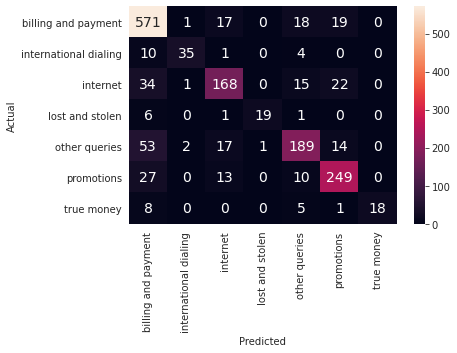

In [18]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(probs_df['category'],probs_df['preds'])
print("Model Score = ", round(model.score(X_valid,y_valid),3))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=model.classes_, yticklabels=model.classes_ , annot_kws={'size':14})
_=plt.ylabel('Actual')
_=plt.xlabel('Predicted')
_=plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

## Prediction with test dataset

In [19]:
# Create prediction dataframe

test_tf = tfidf_fit.transform(test['texts']).toarray()

probs = model.predict_proba(test_tf)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df['texts'] = train['texts']
probs_df['prediction'] = model.predict(test_tf)
probs_df.sample(10)

,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money,texts,prediction
528,0.000,0.000,0.997,0.000,0.001,0.002,0.000,ผมโทรมาสอบถาม ว่าเบอร์ผมถูกระงับได้ยังไงครับ,internet
1160,0.459,0.017,0.105,0.008,0.287,0.112,0.012,สวัสดีค่ะอยากจะทราบยอดค้างชำระค่ะ,billing and payment
381,0.140,0.004,0.635,0.002,0.189,0.026,0.004,มีปัญหา สัญญานหลุดบ่อย,internet
1104,0.170,0.008,0.077,0.006,0.620,0.114,0.006,สอบถามยอด ค่ะ,other queries
814,0.769,0.014,0.097,0.033,0.048,0.035,0.005,จะสอบถามยอดค้างชำระค่าอินเตอร์เน็ตและโทรศัพท์บ...,billing and payment
49,0.334,0.003,0.019,0.002,0.560,0.075,0.008,น้องคะ พี่อยากทราบว่าโทรศัพท์ของพี่ได้เพิ่มวงเ...,other queries
852,0.027,0.002,0.841,0.001,0.023,0.105,0.001,ผมจะเช็คซิมการ์ดหน่ะครับ ว่ามันเสียหรือเปล่าครับ,internet
834,0.877,0.001,0.096,0.003,0.020,0.002,0.002,เบอร์นี้ ใช้ แพ็กเกจ อะไรอยู่,billing and payment
761,0.459,0.017,0.105,0.008,0.287,0.112,0.012,รบกวนเช็คหมายเลขนิดนึงครับ ไม่ทราบว่าถูกระงับบ...,billing and payment
271,0.787,0.003,0.022,0.012,0.153,0.021,0.003,ซิมทรูมูฟวันนี้ไม่มีคลื่นเลยหรอคะ,billing and payment


### Prepare submission template

In [20]:
#Export result to csv file name submission.csv
submission = probs_df[['texts', 'prediction']]
submission
submission.to_csv('submission.csv',index = False, encoding='utf-8')

,texts,prediction
0,โทรศัพท์มีปัญหาโทรออกได้ แต่เวลาคนอื่นโทรเข้าม...,internet
1,สอบถามเกี่ยวกับการโอนเงินของระบบเติมเงินไปอีกห...,other queries
2,แจ้งเครื่องขัดข้อง พอดีดูสัญญาณไม่ได้ค่ะ,other queries
3,สวัสดีครับคือผมอยากทราบยอดค้างค่าบริการทั้งหมด...,billing and payment
4,พี่ครับ ผมอยากทราบว่าตอนนี้ยอดค้างของผมเท่าไหร...,billing and payment
...,...,...
1739,เติมโปรบีบีไป ตัดเงินไปแล้ว ยังใช้งานไม่ได้ครับ,billing and payment
1740,จะสอบถามตอนนี้ของทรูมูฟอะค่ะมีปัญหาเรื่องสัญญา...,true money
1741,จะให้เปิดสัญญาณให้หน่อย ให้น้องไปจ่ายค่าบริการ...,billing and payment
1742,ขอทราบแจ้งยอดสามจีของเบอร์หนูหน่อยได้มั้ยค่ะ ว...,billing and payment


### Export Model

In [21]:
import pickle
filename='logistic_model.pkl'
pickle.dump(model, open(filename, 'wb'))

## load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

### Playground

In [22]:
docs=["the house had a tiny little mouse", 
"the cat saw the mouse", 
"the mouse ran away from the house", 
"the cat finally ate the mouse", 
"the end of the mouse story",
"โทรศัพท์ มี ปัญหา โทร ออก ได้ แต่ เวลา คน อื่น โทร เข้า",
"ที่จะเอาไปเขียนบทความสรุปเนื้อหาจากหนังสือหลายเล่มที่น่าสนใจ"]


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=None,encoding='utf-8',lowercase=False, token_pattern='(?u)\\b\\w\\w*\\b')
X = vectorizer.fit_transform(docs)

In [24]:
print(vectorizer.get_feature_names())
print(X.shape)

['a', 'ate', 'away', 'cat', 'end', 'finally', 'from', 'had', 'house', 'little', 'mouse', 'of', 'ran', 'saw', 'story', 'the', 'tiny', 'คน', 'งส', 'จะเอาไปเข', 'ญหา', 'ท', 'น', 'ป', 'ปเน', 'พท', 'ม', 'มท', 'ยนบทความสร', 'อ', 'อหลายเล', 'อหาจากหน', 'ออก', 'า', 'าสนใจ', 'เข', 'เวลา', 'แต', 'โทร', 'โทรศ', 'ได']
(7, 41)


In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
true_k = 2
title = [1,2,3]
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

KMeans(max_iter=200, n_clusters=2)

   title  cluster
0      1        0
1      2        0
2      3        0


## Model 1 Follow https://colab.research.google.com/drive/1uaOsotWWgHGGceXkoE75xzSdlYsMZ4RK?authuser=0

In [26]:
#Do tokenization
train1 = train.copy()
train1['texts'] = train1['texts'].apply(lambda x : my_split_word(x))

In [27]:
train1

,texts,destination
0,"[โทรศัพท์, มีปัญหา, โทร, ออก, ได้, แต่, เวลา, ...",billing and payment
1,"[สอบถาม, เกี่ยวกับ, การ, โอน, เงิน, ของ, ระบบ,...",billing and payment
2,"[แจ้ง, เครื่อง, ขัดข้อง, พอดี, ดู, สัญญาณ, ไม่...",billing and payment
3,"[สวัสดี, ครับ, คือ, ผม, อยาก, ทราบ, ยอด, ค้าง,...",billing and payment
4,"[พี่, ครับ, ผม, อยาก, ทราบ, ว่า, ตอนนี้, ยอด, ...",billing and payment
...,...,...
10325,"[คะ, จะแจ้ง, อา, ยัติ, ซิม, คะ, เนื่องจาก, โทร...",lost and stolen
10326,"[มือถือ, หาย, ค่ะ]",lost and stolen
10327,"[ครับ, โทรศัพท์, หาย, ครับ, ต้อง, การระงับ, สั...",lost and stolen
10328,"[โทรศัพท์, หายนะ, ค่ะ, จะ, รบกวน, ให้, พี่, ค้...",lost and stolen


In [28]:
tokens_list = train1['texts'].values.tolist()

### Bag of words + count word

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
tokens_list_j = [','.join(tkn) for tkn in tokens_list]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat = cvec.fit_transform(tokens_list_j)

In [30]:
cvec.vocabulary_

{'โทรศัพท์': 3294,
 'มีปัญหา': 1852,
 'โทร': 3292,
 'ออก': 2494,
 'ได้': 3395,
 'แต่': 3130,
 'เวลา': 3016,
 'คนอื่น': 794,
 'เข้ามา': 2642,
 'ไม่': 3422,
 'ครับ': 807,
 'สอบถาม': 2265,
 'เกี่ยวกับ': 2626,
 'การ': 666,
 'โอน': 3342,
 'เงิน': 2669,
 'ของ': 733,
 'ระบบ': 1953,
 'เติม': 2762,
 'ไป': 3411,
 'อีก': 2552,
 'หมายเลข': 2402,
 'หนึ่ง': 2378,
 'แจ้ง': 3120,
 'เครื่อง': 2659,
 'ขัดข้อง': 743,
 'พอดี': 1719,
 'ดู': 1143,
 'สัญญาณ': 2276,
 'ค่ะ': 900,
 'สวัสดี': 2258,
 'คือ': 883,
 'ผม': 1667,
 'อยาก': 2468,
 'ทราบ': 1329,
 'ยอด': 1889,
 'ค้าง': 912,
 'ค่าบริการ': 906,
 'ทั้งหมด': 1354,
 'พี่': 1748,
 'ว่า': 2180,
 'ตอนนี้': 1192,
 'เท่าไหร่': 2788,
 'ขอ': 731,
 'เพิ่ม': 2900,
 'วงเงิน': 2127,
 'หนู': 2381,
 'จะ': 951,
 'ถาม': 1299,
 'ค่า': 901,
 'ใช้งาน': 3357,
 'ห': 2364,
 'นะ': 1469,
 'ช่วย': 1045,
 'เช็ค': 2706,
 'เบอร์': 2831,
 'ใช้ไม่ได้': 3363,
 'เพราะอะไร': 2894,
 'คะ': 858,
 'ได้รับ': 3402,
 'sms': 540,
 'มี': 1844,
 'ใบ': 3370,
 'ตีกลับ': 1252,
 'กด': 604,
 'สลับ': 2255,


In [31]:
c_feat[:,:20].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

### Bag of words + tf-idf

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(analyzer=lambda x:x.split(','),)
t_feat = tvec.fit_transform(tokens_list_j)

In [33]:
t_feat[:,:5].todense()

matrix([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [34]:
print(len(tvec.idf_),len(tvec.vocabulary_))

3470 3470


In [35]:
c_feat[:,:5].todense()

matrix([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

## Model kmeans

In [36]:
from sklearn.cluster import KMeans
train2 = train.copy()
train2['texts'] = train2['texts'].apply(lambda x : my_split_word_space(x))
texts = train2['texts'].tolist()
len(texts)

10330

In [37]:
#Represent each article as a vector
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = None, ngram_range = (1,3))
vec.fit(train2['texts'])
features = vec.transform(train2['texts'])

TfidfVectorizer(ngram_range=(1, 3))

In [38]:
from sklearn.cluster import MiniBatchKMeans, KMeans
clust = KMeans(init='k-means++', n_clusters=7, n_init=10)
clust.fit(features)

KMeans(n_clusters=7)

In [39]:
yhat = clust.predict(features)
train2['predict']=clust.labels_
#train2['predict']=yhat
#print(clust.predict(X_test))

In [40]:
category = train['destination'].unique().tolist()
category1 = pd.Series(category)
for x in range(0,len(category1)):
    train2.loc[train2['predict'] == x , 'predict' ]= category1[x]
train2['hit'] = (train2['destination'] == train2['predict'])
train2['hit'].value_counts()
train2.sample(10)

False    7068
True     3262
Name: hit, dtype: int64

,texts,destination,predict,hit
3816,พอดี ว่า มี SMS มา บอ กว่า คุณ ได้ สิทธิ์ โทร ...,billing and payment,billing and payment,True
6609,อ๋อ ค่ะ อยาก จะ ยกเลิก เพลง รอ สาย กับ ข้อความ...,other queries,true money,False
6097,ขอโทษ นะคะ คือ จะ รบกวน สอบถาม ดิฉัน สมัคร แพ็...,promotions,billing and payment,False
1240,ครับ สวัสดี ครับ มีปัญหา การใช้งาน มือถือ ครับ...,billing and payment,international dialing,False
5361,เปลี่ยน แพ็คเกจ,promotions,lost and stolen,False
9142,ช่วย เช็ค เบอร์ ทรู เบอร์ นี้ ให้ หน่อย ค่ะ เว...,internet,international dialing,False
5629,ต้องการ สมัคร package บาท,promotions,promotions,True
697,เมื่อ กี่ ทำการ เช็ค ยอด บา ลาน จาก ทรู ไอ เซอ...,billing and payment,billing and payment,True
2335,พอดี ผม โอน เงิน เข้าไป ให้ เพื่อน จะ ขอ รหัส ...,billing and payment,billing and payment,True
6705,คุณ ครับ ต้องการ ยกเลิก เสียงเพลง รอ สาย,other queries,true money,False


##  Latent Dirichlet Allocation and Non-Negative Matrix factorization

In [ ]:
# https://stackabuse.com/python-for-nlp-topic-modeling/

In [58]:
#Split train-test
train_clean_LDA = train_clean1.copy()
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_clean_LDA, test_size=0.15, random_state=260)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=None, lowercase=None, ngram_range=(1,2), min_df=20, sublinear_tf=True)
train_clean1['texts'] = train_clean1['texts'].astype(str)

tfidf_fit  = tfidf.fit(train_clean1['texts'])
text_train = tfidf_fit.transform(train_df['texts'])
text_valid = tfidf_fit.transform(valid_df['texts'])
text_test  = tfidf_fit.transform(test['texts'])
#text_train.shape, text_valid.shape

X_train = text_train.toarray()
X_valid = text_valid.toarray()
X_test = text_test.toarray()

y_train = train_df['destination']
y_valid = valid_df['destination']

In [60]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=7, random_state=42)
LDA.fit(X_train)

LatentDirichletAllocation(n_components=7, random_state=42)

In [61]:
topic_values = LDA.transform(X_train)
topic_values.shape

(8780, 7)

In [67]:
train_df['Topic'] = topic_values.argmax(axis=1)

In [71]:
train_df.sample(10)

,texts,destination,Topic
4461,แจ้ง โทรศัพท์ ไม่ มี สัญญาณ ค่ะ,billing and payment,6
7048,สอบถาม เรื่อง อินเตอร์เน็ต ครับ เรื่อง ยอด ค้า...,billing and payment,2
4285,สอบถาม เบอร์ ที่ โทร เข้ามา ว่า ตัด รอบ บิล วั...,billing and payment,1
5065,ซิม อยาก จะ ใช้ เป็น แบบ รายเดือน ไม่ ทราบ ว่า...,promotions,0
3145,ค่ะ พอดี โทรศัพท์ โดน ระงับ ใช้ อ่ะ ค่ะ,billing and payment,6
8273,พอดี จะ เปลี่ยน สอบถาม โปรโมชัน True Move แล้ ...,promotions,5
2868,สอบถาม การ ผ่อนชำระ ipad,promotions,2
8118,ยกเลิก ข้อความ,other queries,5
684,อยาก จะ ให้ ยกเลิก ข้อความ ให้ หน่อย,other queries,5
7732,เช็ค ให้ หน่อย หมายเลข เปิด บริการ ให้ เรียบร้...,billing and payment,4


## Another LDA (Thai)

In [ ]:
# https://datadairy.blogspot.com/2019/06/lda-topic-modeling.html

In [83]:
import pandas as pd
import numpy as np
import time
from pymongo import MongoClient
from bson.objectid import ObjectId
import import_ipynb
#import utilities.config as config
import datetime
import calendar
import scipy.stats
from datetime import timedelta, date
import pytz
from pytz import timezone
import multiprocessing
from multiprocessing import cpu_count #For Parallel
from IPython.display import clear_output
from IPython.display import clear_output

cores = cpu_count() #Number of CPU cores on your system
partitions = cores #Define as many partitions as you want to run parallel

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def parallelize(data, func):
    data_split = np.array_split(data, partitions)
    pool = multiprocessing.Pool(cores)     #สร้าง multiprocessor จำนวนเท่ากับ core cpu ของ server
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

#ตัดคำ
def preprocess(text):
    result = []
    global progress
    progress = progress + 1
    if(progress % 250 == 0):
        clear_output()
        printProgressBar (progress, allLen, 0,0, '','', 1,100, '█')
    for token in word_tokenize(text,engine='newmm'): 
        token = token.strip()
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >5 and token != "พร็อพเพอร์ตี้" and token != "ดีเวลลอปเม้นท์" and token != "เฮ้าส์" and token != "โครงการ" and token != "บริษัท" and token != "บ้านเดี่ยว" and token != "วงแหวน" and token != "ที่จอดรถ" and token != "พระราม" and token!= "เพอร์เฟค":
            result.append(lemmatize_stemming(token))
    return result


def func(documents):
    res = documents['headline_text'].map(preprocess)
    return res

def cleanText(documents):
    documents['headline_text'] = documents['headline_text'].str.replace('|',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\\',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\/',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('.',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('_','')
    documents['headline_text'] = documents['headline_text'].str.replace('\d+', '')
    documents['headline_text'] = documents['headline_text'].str.replace('-',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    pattern = '|'.join(['&', '%', ';', '='])
    documents['headline_text'] = documents['headline_text'].str.replace(pattern, ' ')
    documents = documents.loc[~documents['headline_text'].str.contains("img")]
    documents.headline_text.replace({r"[a-zA-Z]+":''}, regex=True, inplace=True)
    documents['headline_text'] = documents['headline_text'].str.replace(':',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('#',' ')
    documents['headline_text'] = documents['headline_text'].str.strip()
    documents = documents.loc[documents['headline_text']!= ""]
    documents = documents.dropna().reset_index(drop=True)
    return documents

In [84]:
documents = train.copy()
documents = documents.rename(columns={'texts':'headline_text'})

In [85]:
documents = parallelize(documents,cleanText)
documents.head()

,headline_text,destination
0,โทรศัพท์มีปัญหาโทรออกได้ แต่เวลาคนอื่นโทรเข้าม...,billing and payment
1,สอบถามเกี่ยวกับการโอนเงินของระบบเติมเงินไปอีกห...,billing and payment
2,แจ้งเครื่องขัดข้อง พอดีดูสัญญาณไม่ได้ค่ะ,billing and payment
3,สวัสดีครับคือผมอยากทราบยอดค้างค่าบริการทั้งหมด...,billing and payment
4,พี่ครับ ผมอยากทราบว่าตอนนี้ยอดค้างของผมเท่าไหร...,billing and payment


In [86]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
from pythainlp.tokenize import word_tokenize

In [87]:
allLen = documents.shape[0]
progress = 0
# Print iterations progress
def printProgressBar (iteration, total,mode = 0,current_percent = 0, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█'):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        mode        - Optional  : Mode of output (Int : (dafault 0 : grahical progress bar , 1 : standard text))
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    if mode == 0 :
        filledLength = int(length * iteration // total)
        bar = fill * filledLength + '-' * (length - filledLength)
        print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = '\r')
        # Print New Line on Complete
        if iteration == total:
            print()
    elif mode == 1:
        if current_percent != round(float(percent),1):
            current_percent = round(float(percent),1)
            print(percent+"%")
        return current_percent
    return 0

In [88]:
stemmer = PorterStemmer()
processed_docs = parallelize(documents,func)# preprocess, ['headline_text']

In [89]:
processed_docs.head()

0    [โทรศัพท์, มีปัญหา, คนอื่น, เข้ามา]
1           [สอบถาม, เกี่ยวกับ, หมายเลข]
2             [เครื่อง, ขัดข้อง, สัญญาณ]
3           [สวัสดี, ค่าบริการ, ทั้งหมด]
4                     [ตอนนี้, เท่าไหร่]
Name: headline_text, dtype: object

In [90]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 คนอื่น
1 มีปัญหา
2 เข้ามา
3 โทรศัพท์
4 สอบถาม
5 หมายเลข
6 เกี่ยวกับ
7 ขัดข้อง
8 สัญญาณ
9 เครื่อง
10 ค่าบริการ


In [91]:
# ตัดคำฟุ่มเฟือยออก โดยลบคำที่ปรากฏบ่อยเกิน 50% และให้เหลือไปถึง1พันคำ
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=1000)  #reduce to 1K word

In [92]:
# Gensim doc2bow
# For each document we create a dictionary reporting how many
# words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

# run LDA แบ่งคำออกเป็น9กลุ่ม โดยใช้ cpu ทุกตัว (serverที่เราใช้มี32cpu)
#worker = cpu core amount -1
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=9, id2word=dictionary, passes=2, workers=31)

# For each topic, we will explore the words occuring in that topic and its relative weight.
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, 0.6438672792354905), (1, 0.6366804686889476), (2, 0.4243499823493679)]
Topic: 0 
Words: 0.215*"สอบถาม" + 0.039*"ยอดค้างชำระ" + 0.034*"สัญญาณ" + 0.033*"ชั่วโมง" + 0.030*"หรือเปล่า" + 0.027*"ทรูมูฟ" + 0.026*"แพคเกจ" + 0.025*"ตอนนี้" + 0.023*"เบอร์โทรศัพท์" + 0.023*"เท่าไหร่"
Topic: 1 
Words: 0.124*"ต้องการ" + 0.120*"สอบถาม" + 0.081*"ยกเลิก" + 0.072*"บริการ" + 0.049*"การใช้งาน" + 0.033*"ค่าใช้จ่าย" + 0.025*"เข้าไป" + 0.025*"ทรูมูฟ" + 0.018*"ค่าบริการ" + 0.018*"หมายเลข"
Topic: 2 
Words: 0.116*"ใช้งาน" + 0.113*"อินเตอร์เน็ต" + 0.073*"โปรโมชั่น" + 0.072*"สอบถาม" + 0.049*"ต่างประเทศ" + 0.048*"เกี่ยวกับ" + 0.046*"ทรูมูฟ" + 0.035*"รายเดือน" + 0.025*"หรือยัง" + 0.019*"การทราบ"
Topic: 3 
Words: 0.164*"สอบถาม" + 0.122*"โปรโมชั่น" + 0.118*"เรื่อง" + 0.049*"บริการ" + 0.041*"อินเตอร์เน็ต" + 0.034*"ตอนนี้" + 0.030*"ยกเลิก" + 0.025*"เปลี่ยน" + 0.024*"สัญญาณ" + 0.023*"ใช้งาน"
Topic: 4 
Words: 0.087*"โปรโมชั่น" + 0.081*"สอบถาม" + 0.052*"ใช้ไม่ได้" + 0.051*"บริการ" + 0.049*"ค่าบริการ" + 0.035*"เปลี่ย

## Model 3 : use pipeline

In [ ]:
train1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train1["texts"], train1['destination'], test_size=0.20, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

text_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=None, ngram_range=(1,2) , lowercase = False)),
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB(alpha=0.001)),
])

text_clf.fit(X_train, y_train)
text_clf.score(X_test, y_test)

In [ ]:
# Create df (english) for testing

# raw_data = {'texts':['Whether you’re new to spaCy, or just want to brush up on some NLP basics and implementation details ', 'This page should have you covered. ', 'Each section will explain one of spaCy’s features in simple terms and with examples or illustrations. ', 'Some sections will also reappear across the usage guides as a quick introduction.'], 'Age':[20, 21, 19, 18]} 
# train = pd.DataFrame(raw_data)
# train

In [ ]:
#Unused as we manually do text tokenization

# Filter to get only text that has len > 4

# train = train[train['texts'].map(len) > 4]
# len(train)

## Check mis spell Thai word

In [ ]:
from pythainlp.spell import *
a=spell("ปญหา")
print(a) # ['สี่เหลี่ยม', 'เสียเหลี่ยม', 'เหลี่ยม']
a[0]

## Do LDA

In [ ]:
train.head()

In [ ]:
#nlp = spacy.load('th')
my_nlp_experiment = nlp.setup(data=train, target='texts',custom_stopwords=None)

In [ ]:
lda_model = nlp.create_model(model=hdp', multi_core=True, num_topics=2)
display(lda_model)

In [ ]:
lda_result = nlp.assign_model(lda_model)
display(lda_result)